## Example Datasets

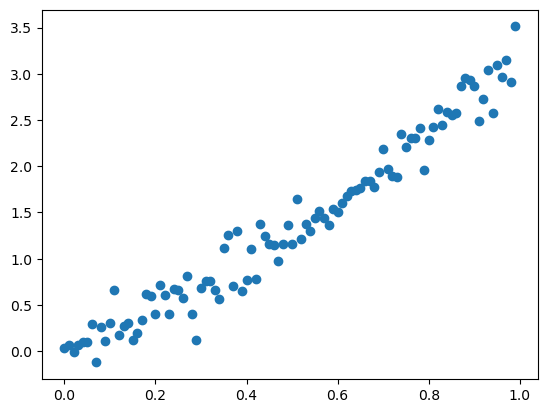

In [198]:
import matplotlib.pyplot as plt
import numpy as np

def get_polynomial_datasets(n_samples=100): #임의의 값을 가지지 위한 설정
    np.random.seed(45)
    X = np.array(range(n_samples)) / n_samples
    np.random.shuffle(X)

    coeff = np.random.rand(2, ) * 3
    y = coeff[0] * X ** 2 + coeff[1] * X + np.random.normal(0, 0.2, n_samples)
    X = X.reshape(-1, 1)

    # data[0] -> X, data[1] -> y
    data = np.c_[X, y]
    return data

n_samples = 100
data = get_polynomial_datasets()

plt.scatter (data[:, 0], data[:, 1])
plt.show()


## RANSAC Steps
1. 샘플 데이터를 선택하고, 이를 이용해 모델을 추정한다.
2. 샘플 데이터 외에 나머지 데이터를 이용해 추정 모델과 일치하는(method) 데이터의 개수를 계산한다.
3. 일치하는 데이터의 개수가 일정한 임계치 이상이라면, 이를 최종 추정 모델로 사용한다. (일정 개수 이상이고 & 직전 최종 값보다 높으면 최종 추정 모델로 갱신한다.)
4. 새로운 샘플을 선택하고, 일정 횟수만큼(max_trials) 반복한다.

In [199]:

def ransac(data, model_class, min_samples, m_threshold, r_threshold, max_trials):
    #RANSAC Initialize
    best_model = None
    best_inlier_count = 0

    data = np.asarray(data)
    tirals = 0

    #Step 4. 새로운 샘플을 선택하고 반복
    while tirals < max_trials:
        #Step 1. 샘플 데이터를 선택하고, 이를 이용해 모델을 추정한다.
        samples = np.random.choice(len(data), min_samples, replace=False)
        sample_data = data[samples]
        model = model_class.fit(sample_data)

        #Step 2. 모델과 일치하는 데이터의 개수 세기
        inlier_count = 0
        for point in data:
            if model.is_inlier(point, m_threshold):
                inlier_count += 1

        #Step 3. 일정 임계치 이상이라면 최종 추종 모델로 갱신
        if inlier_count > best_inlier_count:
            best_inlier_count = inlier_count
            best_model = model

        if r_threshold != None:
            if best_inlier_count > r_threshold:
                break
        
        tirals += 1

    print(f"max trials: {tirals}")
    return best_model

## RANSAC MODEL

In [200]:
class SecondPolynomialModel:
    def __init__(self, coeffs=None):
        self.coeffs = coeffs

    def fit(self, sample_data):
        x = sample_data[:, 0]
        y = sample_data[:, 1]

        #ax^2 + bx + c
        A = np.vstack([x**2, x, np.ones(len(x))]).T
        self.coeffs, _, _, _ = np.linalg.lstsq(A, y)
        return self

    def is_inlier(self, point, m_threshold):
        x = point[0]
        y = point[1]

        predicted_y = self.coeffs[0]*x**2 + self.coeffs[1]*x + self.coeffs[2]
        if np.abs(predicted_y - y) < m_threshold:
            return True
        else:
            return False
        
    def calc_y(self, x):
        y = self.coeffs[0]*x**2 + self.coeffs[1]*x + self.coeffs[2]
        return y


In [201]:
class ThirdPolynomialModel:
    def __init__(self, coeffs=None):
        self.coeffs = coeffs

    def fit(self, sample_data):
        x = sample_data[:, 0]
        y = sample_data[:, 1]

        #ax^3 + bx^2 + cx + d
        A = np.vstack([x**3, x**2, x, np.ones(len(x))]).T
        self.coeffs, _, _, _ = np.linalg.lstsq(A, y)
        return self

    def is_inlier(self, point, m_threshold):
        x = point[0]
        y = point[1]
        predicted_y = self.coeffs[0]*x**3 + self.coeffs[1]*x**2 + self.coeffs[2]*x + self.coeffs[3]
        if np.abs(predicted_y- y) <m_threshold:
            return True
        else:
            return False
        
    def calc_y(self, x):
        y = self.coeffs[0]*x**3 + self.coeffs[1]*x**2 + self.coeffs[2]*x + self.coeffs[3]
        return y

In [202]:
model_class = SecondPolynomialModel()

model = ransac(data, model_class, min_samples=2, m_threshold=0.3, r_threshold=int(n_samples*0.7), max_trials=1000)

max trials: 0


C:\Users\user\AppData\Local\Temp\ipykernel_27856\773327637.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.coeffs, _, _, _ = np.linalg.lstsq(A, y)


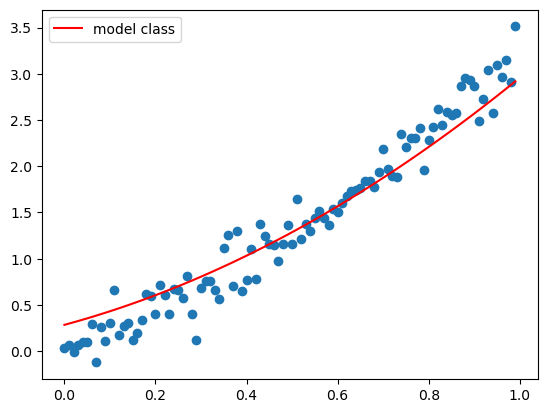

In [203]:
def plot_model(model, n_samples):
    x = np.array(range(n_samples)) / n_samples
    y = model.calc_y(x)

    plt.plot(x, y, 'r', label="model class")

plot_model(model, n_samples)
plt.scatter(data[:,0], data[:,1])
plt.legend()
plt.show()

max trials: 16


C:\Users\user\AppData\Local\Temp\ipykernel_27856\3054375676.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  self.coeffs, _, _, _ = np.linalg.lstsq(A, y)


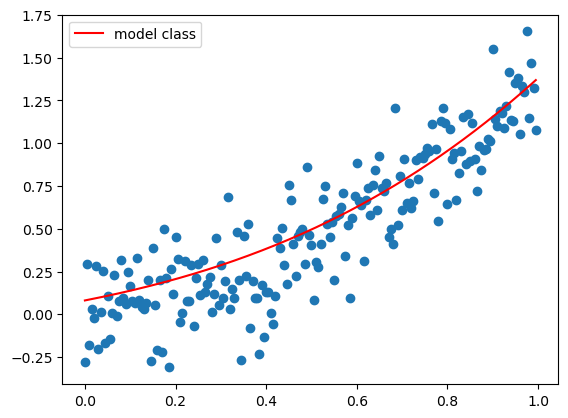

In [204]:
n_samples = 200
data = get_polynomial_datasets(n_samples)

model_class = ThirdPolynomialModel()
model = ransac(data, model_class, min_samples=2, m_threshold=0.3, r_threshold=int(n_samples*0.85), max_trials=1000)

plot_model(model, n_samples)
plt.scatter(data[:,0], data[:,1])
plt.legend()
plt.show()